#Ejemplo de Clasificación con Dataset Iris
En este cuaderno resolveremos el problema de clasificación del dataSet Iris utilizando un modelo de aprendizaje supervisado.
A Iris ya lo analizamos en la Unidad anterior por lo que no repetiremos en este cuaderno el análisis exploratorio del mismo.
Recomendamos si no lo recordas repasar el material AnalisisExploratorio.ipynb


## Aprendizaje automático Supervisado
Es el uso de datos de entrenamiento etiquetados con los resultados esperados. Es decir, se necesita la intervención humana para la preparación de los datos de entrenamiento.

A medida que los datos de entrenamiento se introducen en el modelo, este ajusta sus ponderaciones hasta que dicho modelo se haya ajustado adecuadamente.

Este conjunto de datos incluye datos de entrada y resultados correctos, que permiten que el modelo aprenda con el tiempo. El algoritmo mide su precisión a través de la función de pérdida, ajustándose hasta que el error se haya minimizado lo suficiente
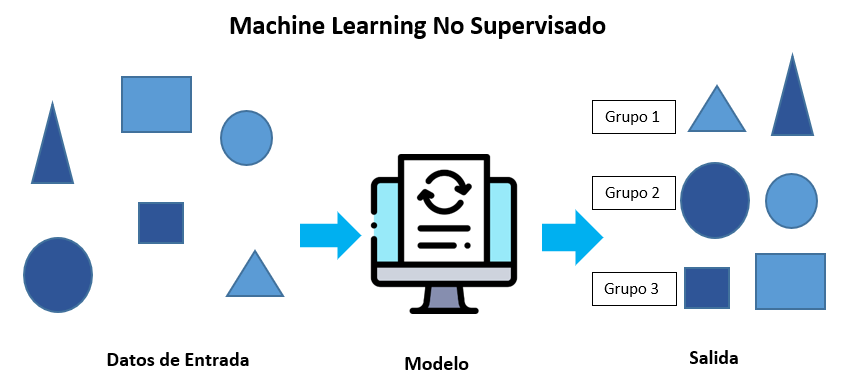

## Bibliotecas a utilizar en el cuaderno

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

Creación de un dataframe a partir del archivo csv

In [36]:
dfIris = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSLgU6YF5djPgcJvcmXyqdIjfVefPsYlj6HUnRH15sZwsEL4GX7KPY-c3CWgM3n8vCljid-ZPocdAAl/pub?output=csv')

In [37]:
dfIris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Preprocesamiento
Renombraremos las columnas al español, y eliminaremos la columan Id ya que no será utilizada para el análisis

In [38]:
#Renombrado de columnas
dfIris.rename({'SepalLengthCm':'sepalo_largo',
           'SepalWidthCm':'sepalo_ancho',
           'PetalLengthCm':'petalo_largo',
           'PetalWidthCm':'petalo_ancho',
           'Species':'especies'},
          axis=1, inplace=True) # inplace = True para que el renombrado sea sobre el mismo df

dfIris.drop('Id', axis=1, inplace=True) #axis=1 indica que es una columna


Inspección de la forma del df

In [39]:
dfIris.shape

(150, 5)

Visualización del segmento inicial y final de los datos

In [40]:
dfIris

,sepalo_largo,sepalo_ancho,petalo_largo,petalo_ancho,especies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


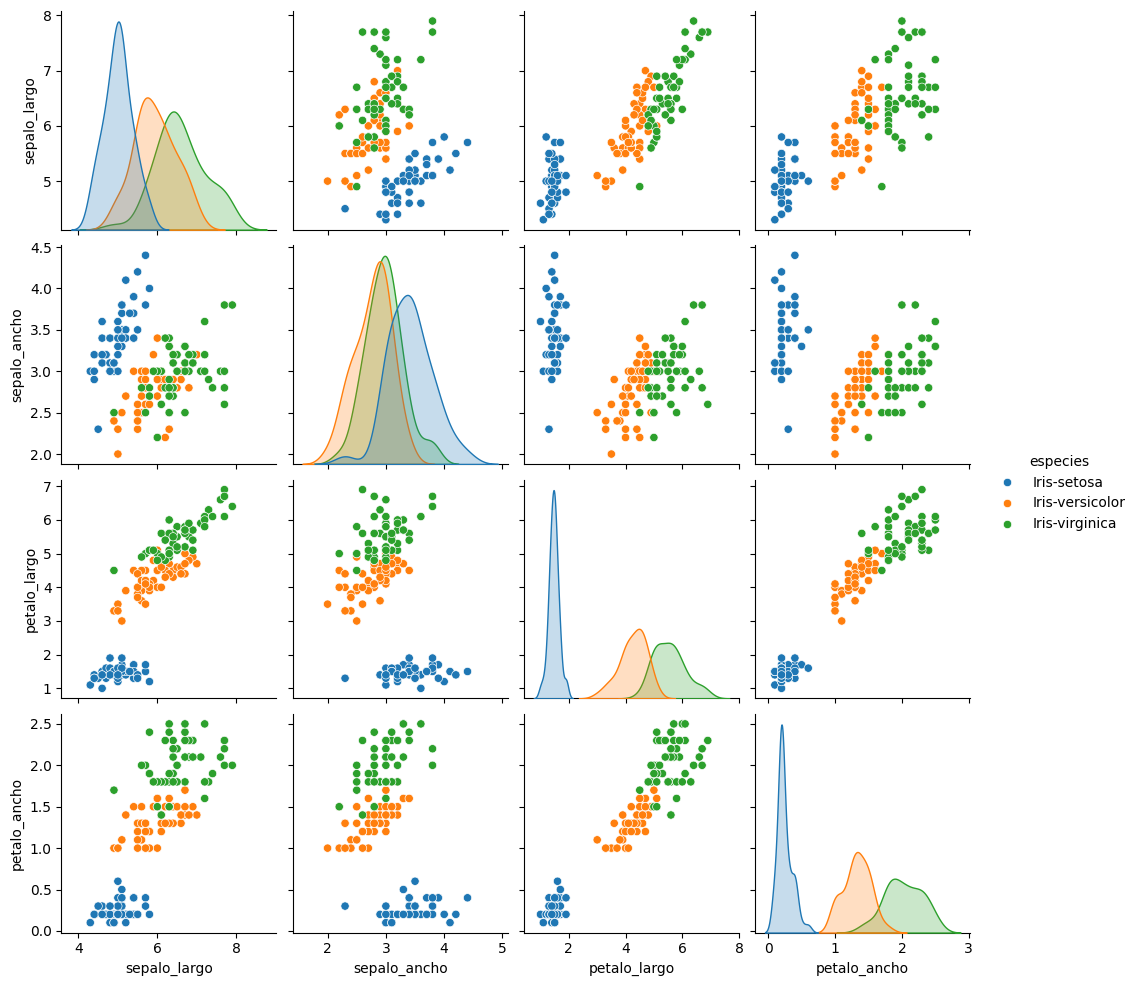

In [41]:
sns.pairplot(dfIris, hue="especies", diag_kind="kde")

<Axes: >

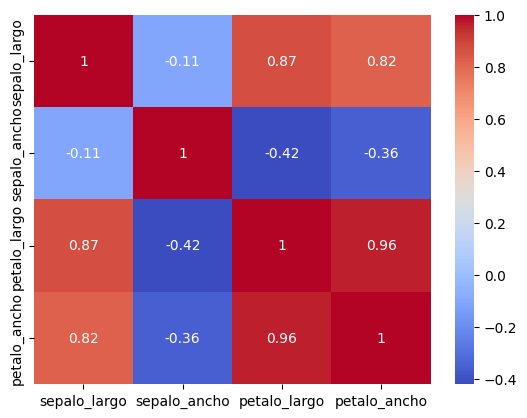

In [42]:
# Armo la matriz de Correlación de Pearson para entender la dependencia entre las variables de entrada
correlation_matrix = dfIris.drop(columns=['especies']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


Para el entrenamiento se utilizarán las etiquetas correspondientes pero para el test no así para el testeo. Por lo tanto se separará del dataframe la columna corespondiente a especies

In [43]:
# Separo en X los atributos , en y las etiquetas
X = dfIris[['petalo_largo','sepalo_ancho']].values
y = dfIris['especies'].values


 Una particularidad que tiene Knn que la variable objetivo no puede se categòrica, por lo tanto para poder usuarlo como clasificador se debe Codificar para que sea numèrica


In [44]:
le = LabelEncoder()
y = le.fit_transform(y) #transforma las etiquetas en còdigos numericos
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Algoritmo k-NN
Los casos próximos entre sí se denominan “vecinos”. Cuando se presenta un nuevo caso (reserva), se calcula su distancia desde cada caso del modelo. Las clasificaciones de los casos más parecidos, o sea  los vecinos más próximos, se guardan y el nuevo caso se incluye en la categoría que contiene el mayor número de vecinos más próximos.
K es el  número de vecinos más próximos a examinar.
Asumiendo que cada ejemplo puede representarse como un punto en un espacio n-dimensional, para un ejemplo en particular los k ejemplos más cercanos en el espacio son sus vecinos más cercanos (k- Nearest Neighbors) : almacena todos los ejemplos disponibles y predice la clase de nuevos ejemplos en base a la similitud con ellos.



# Particionamiento
Como Iris es un dataset pequeño de tan solo 150 instancias, utilizaremos una partición 80-20.


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print(y_train)

[[5.5 3.1]
 [4.5 3. ]
 [1.5 3.5]
 [4.9 3. ]
 [5.6 2.8]
 [3.9 2.7]
 [1.7 3.8]
 [5.1 2.7]
 [4.2 3. ]
 [4.  2.6]
 [5.5 3. ]
 [1.3 3.2]
 [5.1 3.1]
 [1.6 3.5]
 [1.5 3.7]
 [3.5 2. ]
 [5.5 3. ]
 [5.7 3.3]
 [5.  2.2]
 [5.8 2.5]
 [3.9 2.5]
 [6.1 3. ]
 [4.7 3.3]
 [3.8 2.4]
 [4.9 2.7]
 [5.1 2.8]
 [4.5 2.5]
 [5.  2.5]
 [4.7 3.2]
 [5.2 3. ]
 [4.5 3.4]
 [1.6 3.1]
 [5.1 2.7]
 [4.2 2.7]
 [3.6 2.9]
 [4.  2.5]
 [4.6 3. ]
 [6.  3.2]
 [1.5 3.7]
 [1.1 3. ]
 [5.3 2.7]
 [4.2 3. ]
 [1.7 3.4]
 [1.5 4.4]
 [4.9 3.1]
 [1.5 3.1]
 [5.1 3. ]
 [3.  2.5]
 [1.4 3.4]
 [4.5 2.2]
 [6.1 3.6]
 [4.2 2.9]
 [1.4 3. ]
 [5.9 3. ]
 [5.7 3.2]
 [5.8 3. ]
 [5.6 2.8]
 [1.6 3.8]
 [1.6 3.4]
 [5.1 3.2]
 [5.7 3.3]
 [1.3 2.3]
 [5.4 3.4]
 [1.4 3. ]
 [5.  2.5]
 [5.4 3.1]
 [1.3 3.2]
 [1.4 3.6]
 [5.8 3. ]
 [1.4 3.5]
 [1.3 3. ]
 [1.7 3.9]
 [4.  2.3]
 [5.9 3.2]
 [6.6 3. ]
 [1.4 3.5]
 [1.5 3.1]
 [1.4 3.4]
 [4.5 2.8]
 [4.4 3. ]
 [1.2 3.2]
 [1.7 3.3]
 [4.3 2.9]
 [1.5 3.4]
 [6.9 2.6]
 [3.3 2.4]
 [6.4 3.8]
 [4.4 3.1]
 [1.5 4.1]
 [4.8 3. ]
 [1.2 4. ]

#Selección de k
Iris tiene 150 instancias, por lo tanto el entero menor más cercano a su raiz cuadrada es 12. Utilizaremos k=12

In [46]:
modeloClasificador = KNeighborsClassifier(n_neighbors=12)

#Entrenamiento
Se utiliza el método fit , y se pasan como parámetros la partición de entrenamiento tanto de X (que tiene las entradas) como también las etiquetas (valores esperados) y

In [47]:
modeloClasificador.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

# Testeo
Para evaluar los resultados se realizarán las predicciones de la partición de testeo (sin etiquetas)

In [48]:
y_pred = modeloClasificador.predict(X_test)

#Evaluación de resultados
En este caso para evaluar los resultados utilizaremos la matriz de confusión y el reporte de clasificación que muestra una serie de métricas comparadas

In [49]:
 #Matriz de confusión
print(confusion_matrix(y_test, y_pred)) #Matriz de confusion con las etiquetas reales de Test y los valores predichos

# Reporte de clasificación
print(classification_report(y_test, y_pred))


[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



#Conclusiones
Con 150 instancias que tiene Iris, particionamiento 80/20 y un k=12 se realiza una predicción muy buena con un Accuracy de 0.97, con sólo un fallo en la clase versicolor que la clasificó como virginica.
Por tratarse de un dataset pequeño es un muy buen resultado.